# Generating prior frequency distribution file with different time offset

In [1]:
import os
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR\\")
from Utils.lm import *

# train model and generate new with varying frequencies
lm_model = LM_model(m=3, n=11, data_root_dir=r'../Data', output=r'../Output')
# t = ['1601', '1602'] # for testing
# ag_strategy_1701 = lm_model.LM_set(commodity='ag', exp_list=t, flg='train', freq=5, interval=1)

zn_contracts = ['1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712']
zn_strategy = lm_model.LM_set(commodity='zn', exp_list=zn_contracts, flg='train', freq=5, interval=1)
zn_strategy.to_csv(r'../Strategy/zn_5min_strategy_t.csv', index=False)


ModuleNotFoundError: No module named 'Utils'

# Backtesting with IN SAMPLE data

In [3]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/crypto_strategy_BITSTAMP.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
lm_validation = LmValidation(slm, symbol = 'zn*', data_dir = r'../Output', 
                             valid_dir = r'../Validation_IS', max_order = 8, tca = 'Fixed', opt = 'CL', data_mode = 'Insample')
lm_validation.run()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


# Backtesting with OUT SAMPLE data

In [ ]:
import os
import sys
sys.path.append("C:\\Users\\maxwell\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_all.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
lm_validation = LmValidation(slm, symbol = 'zn*', data_dir = r'../Output', valid_dir = r'../Validation_OS', max_order = 8, tca = 'Fixed', opt = 'CL', data_mode = 'Outsample')
lm_validation.run()

C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\maxwell\QishiQR\Backtesting\Vectorized\backtest.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
C:\Users\maxwell\QishiQR\Backtesting\Vectorized\backtest.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


In [16]:
import os
import sys
sys.path.append("C:\\Users\\maxwell\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_all.csv')
slm = zn_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
print(slm.sort_values('CL'))


            prior       0       1       2   total signal        CL
0               p  515901  118818  122274  756993      0  0.000000
8147   p021110000      13       4       3      20      0  0.000000
8148   p021110001       0       0       0       0      0  0.000000
8149   p021110002       6       1       1       8      0  0.000000
8150    p02111001       4       4       3      11      0  0.000000
20709  p200221020       1       1       0       2      0  0.000000
8152   p021110011       2       1       1       4      0  0.000000
8154    p02111002       6       2       4      12      0  0.000000
8156   p021110021       1       1       0       2      0  0.000000
20704   p20022101       5       4       2      11      0  0.000000
20702  p200221001       3       3       2       8      0  0.000000
20701  p200221000       8       1       1      10      0  0.000000
8162   p021110102       3       1       2       6      0  0.000000
20700   p20022100      10       8       1      19      0  0.00

C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\maxwell\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [14]:
prior = np.array(slm.loc[:,'prior'])

sizes = [np.sqrt(2**(len(i)-1)) for i in prior]
print(sizes)

[1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.6568542494923806, 8.0, 11.313708498984761, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 11.313708498984761, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 11.313708498984761, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 8.0, 11.313708498984761, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 16.0, 22.627416997969522, 22.627416997969522, 22.627416997969522, 11.313708498984761, 16.0, 22.6274169979695

In [8]:
a= np.where(sig_prior=='0', 0, 1)
cl = cl*a
for i in cl:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.127662684626
0.0
0.0
0.0
0.0
0.834583511727
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.806523819964
0.185710854326
0.0
0.0
0.849423877497
0.623622036654
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.221710911995
0.0
0.0
0.344381149758
0.6384085581
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.323413827829
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.537222830365
0.0
0.0
0.0870457910841
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.304296395531
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.06845525452
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.360505745655
0.0
0.0
0.974838680655
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.22987289085
0.0
0.520902679197
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.632463437728
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.235706974441
0.0
0.679040633862
0.0
0.66667
0.0
0.0
0.0
0.379873906359
0.516402943472
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.291294914693
0.0
0.138017942327
0.545549089948
0.0
0.0
0.0
0.0
0.0
0.398415512588
0.0
0.0
0.365152936025
0.136085485143
0.0
0.0
0.516402943472
0.272170970286
0.476076689807
0.291294914693
0.0
0.365152023154
0.0
0.0
0.0
0.69567056204
0.235706974441
0.234419898106
0.0
0.33334
0.941519074971
0.0
0.0
0.0
0.0
0.398415512588
0.221412577534
0.365152936025
0.0
0.398415512588
1.17074968516
0.516402943472
0.0
0.26149602483
0.0
0.0
0.0
0.0
0.0
0.0
0.537222830365
0.0
0.471406877814
0.272170970286
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.239054088467
0.0
0.0
0.632461856589
0.22987289085
0.0
0.379873906359
0.192453938732
0.0
0.0
0.0
0.192453938732
0.136085485143
0.156562335014
0.192453938732
0.365152936025
0.0
0.320138466869
0.0
0.69567056204
0.511623024983
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.156562335014
0.66667
0.192453938732
0.0
0.305568173664
0.0
0.0
0.69567056204
0.0
0.207096233644
0.0
0.235706974441
0.0
0.191468319502
0.511623024983
0.365152936025
0.632461856589
0.127662684626
0.0
0.0
0.136085485143
nan
0.291294914693
0.0
0.365152023154
0.379873906359
0.47565958023
0.0
0.365152023154
0.632461856589
0.722014411584
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.398415512588
0.365152936025
0.430340089542
0.0
0.0
0.136085485143
0.0
0.0
0.0
0.136085485143
0.0
0.33334
0.471406877814
0.69567056204
0.235706974441
0.47565958023
0.0
0.398415512588
0.0796858913843
0.176855553058
0.0
0.0
0.0
0.136085485143
0.0
0.0
0.365152023154
0.0
0.438863599945
0.0
0.437560525786
0.0
0.992372086294
0.0
0.0
0.0
0.379873906359
0.516402943472
0.639619114808
0.0
0.365152023154
0.744046259749
0.221412577534
0.0
0.112692868326
0.18490561241
0.375858688748
0.0
0.0
0.545549089948
0.66667
0.294820305323
0.192453938732
0.516404234467
0.847808219645
0.16728542068
0.0
0.0
0.4179635717

0.0
0.267836750175
0.365152936025
0.771522921944
0.516404234467
0.60903422813
0.272170970286
0.272170970286
0.0
0.915242790696
0.0686080089863
0.0
0.18490561241
0.272170970286
0.57507182665
0.0
0.668284638948
0.725832327143
0.604981572278
0.0
0.398415512588
0.097457225342
0.584686185939
0.0
0.0
0.0
0.0
0.0
0.19518684589
0.0
0.545549089948
0.235706974441
0.174653033104
0.545549089948
1.15470631188
0.138017942327
0.335235296009
0.0793661918547
0.0
0.650605741383
0.138017942327
0.962427248887
0.0
0.304296395531
0.430340089542
0.646069050108
0.0
0.22987289085
0.224739467653
0.723528704416
0.138017942327
0.471406877814
0.816500663411
0.365152023154
0.834583511727
0.192453938732
0.18490561241
0.40825645543
0.178183069983
0.650605741383
0.0615506691493
0.112692868326
1.74221129587
0.291901215611
0.0
0.0
0.0
0.0
0.0
0.291294914693
0.0
0.136085485143
0.379873906359
0.191468319502
0.0
0.0
0.365152936025
0.571056433353
0.0
0.0
0.192453938732
0.0
0.646069050108
0.379873906359
0.138017942327
0.2298

0.0
0.26149602483
1.4276576193
0.646069050108
0.0
0.22987289085
0.18490561241
0.552080050096
0.0
0.0
0.0
0.0
0.0
1.06845525452
0.0
0.0
0.097457225342
0.239054088467
0.0
0.0
0.398415512588
0.442825155068
0.438863599945
0.0
0.417963571714
0.259768920549
0.827853895574
0.69567056204
0.379873906359
0.988105679102
0.608592791063
0.0
0.577203926562
0.398415512588
0.21209894236
0.191468319502
0.0
0.18490561241
0.0
0.129848689177
0.0615506691493
0.112692868326
0.626758088505
0.593835014563
0.0
0.525664491804
0.550008
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.69567056204
0.235706974441
0.0
0.398415512588
0.0
0.471406877814
0.317829603156
0.0615506691493
0.744046259749
0.0
0.0
0.0
0.0
0.0
0.365152936025
0.0
0.0
0.0
0.365152936025
0.0
0.0
0.516402943472
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
nan
0.365152023154
0.0
0.0
0.516402943472
0.365152936025
0.0
0.0
0.0
0.0
0.0
0.138017942327
0.136085485143
0.365152023154
0.0
0.73030587205
0.0
0.0
0.136085485143
0.2164744688

0.0
1.14059692457
0.0
0.0
0.0
0.365152936025
0.346852225354
0.192453938732
0.516402943472
0.632461856589
0.248493670444
0.291294914693
0.516404234467
0.47565958023
0.43512918621
0.178183069983
0.235706974441
0.398415512588
0.516404234467
0.873826353903
0.379873906359
0.224739467653
0.395349960723
0.389260176441
0.516402943472
0.138020012524
0.944918741813
1.59079557458
0.121419795141
0.0
0.0
0.0
0.379873906359
0.618804029925
0.365152023154
0.398415512588
0.19518684589
0.743401853568
0.136085485143
0.360048350735
0.272170970286
0.553154635117
0.395349960723
0.192453938732
0.847808219645
0.511623024983
0.570291182342
0.881923718066
0.346852225354
0.545914223369
0.450634367937
0.511623024983
0.591089751696
0.346852225354
1.00907518447
0.544341940573
0.0
0.904245223344
0.650605741383
0.952340140836
0.174653033104
0.471413948881
0.582376055751
1.01577102196
0.0
0.604981572278
0.515462403817
0.905725973617
0.543715265558
0.367368730524
0.0
0.33334
0.379873906359
0.450634367937
0.537222830365

0.545549089948
0.192453938732
0.365152936025
0.22987289085
0.235706974441
0.365152023154
0.379873906359
0.36532157525
0.0
0.0331582961227
0.0
0.398415512588
0.0
0.0
0.0
0.365152023154
0.192453938732
0.320138466869
0.379873906359
0.511623024983
0.66667
1.26518713616
0.0
0.0
0.0
0.235706974441
0.384907877463
0.471406877814
0.138017942327
0.272170970286
0.413461518771
0.0
0.725832327143
0.73030587205
0.47980749576
0.0
0.0
0.516402943472
0.0
0.959551354313
0.192453938732
0.0
0.0
0.13782532983
0.0
0.304296395531
0.398415512588
0.539640058066
0.0
0.0
0.0
0.0
0.0
0.550008
0.0
0.0
0.18490561241
0.0
0.138017942327
0.0
0.545549089948
0.662878756635
0.0
0.516402943472
0.69567056204
0.235706974441
1.09545606946
0.0
0.272170970286
0.0
0.390828395582
0.138017942327
0.47565958023
0.19518684589
0.124182806002
0.159371782769
0.0
0.0
0.272170970286
0.886157073592
0.545549089948
1.0076713445
0.365152936025
0.178183069983
0.511623024983
0.0
0.0
2.60516481498
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.320138466869
0.0


0.545549089948
0.0
0.346852225354
0.379873906359
0.632461856589
0.365152023154
0.0
0.235706974441
0.0796858913843
0.0
1.4409272637
0.0
0.0
0.0
0.0
0.0
0.0
0.650605741383
0.471406877814
0.365152936025
0.471406877814
0.0
0.379873906359
0.136085485143
0.365152023154
0.0
0.0
0.0
0.0
nan
0.0
0.0
0.0
0.0
0.437560525786
0.136085485143
0.545549089948
0.138017942327
1.10337108738
0.0
0.0
0.365152936025
0.0
0.0
0.516404234467
0.398415512588
0.0
0.379873906359
0.0
0.545549089948
0.471406877814
0.538472613212
0.0
0.0
0.0
0.0
0.516402943472
0.0
0.0
nan
0.0
0.0
0.0
0.66667
0.66667
0.0791670301904
0.0
0.0
0.365152023154
0.192453938732
0.724469478243
nan
0.365152936025
0.398415512588
0.291294914693
0.365152023154
0.69567056204
0.379873906359
0.421165169402
0.0
0.138017942327
0.365152936025
0.0
0.0
0.398415512588
0.398415512588
0.235706974441
0.22987289085
0.0
0.650605741383
0.365152936025
1.15005813414
0.0
0.0
0.0
0.69567056204
0.0
0.221412577534
0.0
0.0
0.304296395531
0.138020012524
0.0
0.51640294347

0.720096701469
0.0
1.30121148277
0.26149602483
0.697553600611
0.650605741383
0.395349960723
0.0
1.04866383367
0.622198664699
0.097457225342
0.158143455237
0.97043568189
1.07374719598
0.544341940573
0.567156031008
0.624448361136
1.30373773286
0.317829603156
1.56351680779
0.901791037765
2.63226052187
0.145918246315
0.537222830365
0.124729396207
0.0
1.04810334175
0.471971422005
1.05585741332
0.775585154039
1.06203173536
0.22987289085
0.845111865178
0.746603936927
6.43027992047
1.59326810989
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.537222830365
0.398415512588
0.0
0.0
0.0
0.0
0.365152936025
0.0
0.0
0.0
0.545549089948
0.0
0.0
0.365152936025
0.192453938732
0.942813755627
0.147450434067
0.0
0.0
0.138017942327
0.438401249097
0.0
0.0
0.304296395531
0.0
0.0
0.0
0.224739467653
0.398415512588
0.290667484036
0.0
0.632461856589
0.0
0.768896673
0.0
0.56229992938
0.516404234467
0.0
0.0
0.384907877463
0.365152936025
0.365152023154
0.0
0.224739467653
0.545549089948
0.69567056204
0.136085485143
0.67474000814
0.4

0.33334
0.398415512588
0.628003384578
0.771522921944
0.471406877814
0.235706974441
0.471406877814
0.343312435917
0.69567056204
0.417963571714
0.511623024983
0.174653033104
0.365152936025
0.379873906359
0.365152936025
1.29583609502
0.64396836953
0.0
0.0
0.0
0.0
0.112692868326
0.33334
nan
0.235706974441
0.235706974441
0.395349960723
0.136085485143
0.224739467653
0.0
1.39967060105
0.19518684589
0.0
0.0
0.0
0.260345485873
0.0
0.730304046308
0.259768920549
0.284094035901
0.156562335014
0.191468319502
0.529081363416
0.632837116052
0.411953219009
0.0
0.19518684589
1.04660587228
0.468410395981
0.983826743781
1.06845525452
0.147450434067
0.410274638112
0.18490561241
0.384907877463
0.744046259749
1.57861119815
0.40005044432
0.16728542068
0.632461856589
0.0
0.417963571714
0.410274638112
0.272170970286
0.626758088505
0.0
0.780219855322
0.272170970286
0.0
0.730304046308
1.01541214953
0.0945773658875
0.0615506691493
0.224739467653
0.051905638603
1.16985803663
0.516404234467
1.04074459112
0.566369515

0.264674794319
0.0
0.0
0.192453938732
0.516404234467
0.176394003743
0.0
0.19518684589
0.19518684589
0.294351708732
0.304296395531
0.0
0.33334
1.39518605494
0.784175890865
0.0
0.0
0.192453938732
0.272170970286
0.432767361022
0.0
0.626758088505
0.456839806446
0.230602067606
0.0
0.174653033104
0.493972909992
1.1028397051
0.432767361022
0.69567056204
0.138020012524
0.33334
0.816512910859
0.235706974441
0.52705681762
0.271173918796
0.961328535591
0.626758088505
0.410274638112
1.20139857747
1.01439892204
0.432332363564
0.365152936025
0.239054088467
0.239054088467
1.47576375477
0.632463437728
0.47863258761
1.04684359879
0.635641338949
0.272170970286
0.593182877422
1.08572834457
0.935162767495
0.34880032781
0.672684229434
0.0
0.626758088505
0.40825645543
0.239057674153
0.0
0.0
0.26149602483
0.210829051603
0.0
0.360048350735
0.525664491804
1.25742048633
0.411065898065
0.379873906359
0.26149602483
1.0076713445
0.48827800594
0.437560525786
0.389260176441
0.515462403817
0.745599494139
0.2081380892

0.9028460412
0.0
0.235706974441
0.69567056204
0.69567056204
0.201379963154
0.0
0.0
0.456839806446
0.430340089542
0.365152023154
0.304296395531
0.138017942327
2.47591059938
0.529997470571
0.0
0.0
0.0
0.471406877814
0.0
0.417963571714
0.471406877814
0.192453938732
0.235706974441
0.0
0.0
0.471406877814
0.192453938732
0.865364272934
0.650605741383
0.0
0.471406877814
0.365152936025
0.22987289085
0.66667
0.650605741383
0.0
0.320265915299
0.0796858913843
0.33334
0.983826743781
0.0
0.343312435917
0.0
0.825728328664
0.224739467653
0.114621673968
0.138017942327
0.825728328664
0.771522921944
0.668284638948
0.365152023154
0.0
0.379873906359
1.84041370739
0.0763578965419
0.0
0.0
0.66667
0.0
0.22987289085
0.192453938732
0.365152936025
0.0
0.632463437728
0.0
0.18490561241
0.545549089948
1.44554104547
0.22987289085
0.0
0.650605741383
0.0
0.395349960723
0.471406877814
1.07872719614
0.847808219645
0.795212186251
0.18490561241
0.390196363133
0.47565958023
0.643678940646
0.604981572278
0.0
0.259768920549


0.808845355654
0.0
0.0
0.156562335014
0.661259934409
0.0
0.0
0.0
0.730304046308
0.379873906359
0.239054088467
0.545549089948
0.18490561241
0.272170970286
0.114621673968
0.365152936025
0.272170970286
0.272170970286
0.53567350035
0.577203926562
0.0
0.417963571714
0.0
0.711260790935
0.138017942327
0.525664491804
0.371826975372
0.777828773014
0.69567056204
0.632461856589
0.563444621362
0.870437082345
0.0
0.0
0.516402943472
0.365152936025
0.470195672466
0.272170970286
0.679040633862
0.812338134428
0.468726063921
0.417963571714
0.808845355654
0.0
0.581962102932
0.0
0.0
0.0
0.0
0.942813755627
0.0
0.0
0.0615506691493
0.138017942327
0.456839806446
0.0
0.272170970286
0.516402943472
0.286271711372
0.52705681762
0.0
0.881923718066
0.291294914693
0.235468010065
0.0
0.156562335014
0.291294914693
0.338073534051
0.0
0.26149602483
0.360048350735
0.898443454914
0.19518684589
0.365152936025
0.365152023154
0.516402943472
0.813096484719
0.156562335014
0.417963571714
0.49066319453
0.6384085581
0.37987390635

0.430340089542
0.310636845505
0.438863599945
0.138017942327
0.437560525786
0.379873906359
0.235468010065
0.379873906359
0.456839806446
0.0
0.646069050108
0.365152023154
0.384907877463
0.626758088505
2.30939461799
0.324383538929
0.0
0.0
0.0
0.304296395531
0.112692868326
0.0
0.516404234467
0.0
0.0
0.679040633862
0.0
0.516402943472
0.19518684589
0.867144893584
0.073405658076
0.0
0.272170970286
0.272170970286
0.13782532983
0.138017942327
0.304296395531
0.398415512588
0.3787783646
0.0
0.73030587205
0.26149602483
0.305523376633
0.0646396094727
0.0
0.18490561241
0.304296395531
0.525842751428
0.33334
0.516404234467
0.159371782769
0.698583188755
0.0
0.430340089542
0.18490561241
2.00629092438
0.532026994665
0.0
0.0
0.0
0.272170970286
0.178183069983
0.0
0.0
0.0
0.0
0.550008
0.304296395531
0.33334
0.945756683292
0.777828773014
0.365152023154
0.417963571714
0.124729396207
1.26492687546
0.235706974441
1.06845525452
0.471971422005
0.748069440986
0.259768920549
0.759747812718
0.698583188755
0.93890556

0.0
0.192453938732
0.69567056204
0.459158445282
0.235706974441
0.881923718066
0.360048350735
0.632463437728
0.0
0.545549089948
0.398415512588
1.21199790026
0.0
0.0
0.0
0.112692868326
0.112692868326
0.317829603156
0.235706974441
0.0
0.744046259749
0.308617501159
0.0
0.291294914693
0.525664491804
0.722159313852
0.201379963154
0.304296395531
0.816504745894
0.259768920549
0.652643059515
0.516402943472
0.47565958023
0.529081363416
0.331632857418
0.33334
0.438863599945
0.438863599945
0.786729915608
0.16728542068
0.0
0.224739467653
0.272170970286
0.819311639672
0.0
0.276035884655
0.352916732264
1.20169153837
0.259768920549
1.35866027482
0.604981572278
1.33390571312
0.0
0.0
0.0
0.0
0.0
0.174653033104
0.545549089948
0.379873906359
0.235706974441
0.291294914693
0.365152023154
0.0796858913843
0.650605741383
1.04433584157
0.147450434067
0.235706974441
0.398415512588
0.511623024983
0.620646855074
0.545549089948
0.49066319453
0.343312435917
1.04785882083
0.379873906359
0.449932968619
0.249517909107


0.0
0.578264979689
0.725832327143
2.22472338101
0.390117179251
0.0517129733478
0.0
0.456839806446
0.0
0.489214266458
1.04660587228
0.821764744648
0.276035884655
0.5025327269
0.18490561241
0.545914223369
0.371826975372
1.28542101581
0.518943441712
0.398415512588
0.317829603156
0.367368730524
0.727670001955
1.64666453682
0.522992049659
0.881059103772
1.39317128749
0.207096233644
1.34723895445
1.44772709103
1.25600280574
0.442044528001
0.291294914693
1.02324604997
0.759747812718
0.996553057392
1.0368266948
1.70139918278
0.98037656171
0.919171291305
0.845756893104
0.912889186594
1.27161614709
2.80295312165
0.966115935374
0.0
0.0
0.384907877463
0.259768920549
0.73581827769
0.730304046308
0.390196363133
0.235468010065
0.582376055751
0.0
0.320138466869
0.371826975372
0.821878455849
0.395954453814
0.432767361022
0.698583188755
0.521652094235
1.69547942529
0.542711512413
0.550601251547
0.611269711122
0.673863383013
0.577361816195
0.951662481426
1.44154917675
1.90640421332
0.88642077252
0.0
0.49

In [1]:
from datetime import datetime  
from datetime import timedelta  
  
test_date = "2016101 09:00:00.0"
datetime_test = datetime.strptime(test_date, '%Y%m%d %H:%M:%S.%f')
#Add 1 day  
date_str = (datetime_test - timedelta(weeks=2)).strftime("%Y-%m-%d %H:%M:%S")  
date_str

'2016-09-17 09:00:00'

In [4]:
import calendar
date = '20'+'1801'
date_int = int(date)
year = date_int//100
month = date_int%100
tot_month = year*12+month
tot_month = tot_month -2 
year = tot_month//12
month = tot_month%12
_, num_days = calendar.monthrange(year, month)
num_days
print(str(year)+str(month)+str(num_days))

20171130


In [3]:
import os
import sys
sys.path.append("C:\\Users\\Maxcell-HomePC\\QishiQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

zn_strategy = pd.read_csv(r'../Strategy/zn_5min_strategy_all.csv')

In [5]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\CryptoQR\\")
import pandas as pd
temp = pd.read_csv('../Data/crypto\crypto_price.csv')
symbol = 'DASH'
temp1 = temp.copy()[['date', symbol]]
temp1.rename(columns={symbol:'LastPrice'}, inplace = True)
temp1.set_index('date')
temp1.sort_index()

,date,LastPrice
0,1/2/2015,1.974292
1,1/3/2015,1.818238
2,1/4/2015,1.705425
3,1/5/2015,1.650610
4,1/6/2015,1.667679
5,1/7/2015,1.742234
6,1/8/2015,1.730026
7,1/9/2015,1.747407
8,1/10/2015,1.711341
9,1/11/2015,1.647092


In [15]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\CryptoQR\\")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

temp = pd.read_csv('../Data/crypto\crypto_price_HF.csv')

            
'''
symbol = 'DASH'
temp1 = temp.copy()[['date', symbol]]
temp1.rename(columns={symbol:'LastPrice'}, inplace = True)
temp1.set_index('date')
temp1.sort_index()
'''

"\nsymbol = 'DASH'\ntemp1 = temp.copy()[['date', symbol]]\ntemp1.rename(columns={symbol:'LastPrice'}, inplace = True)\ntemp1.set_index('date')\ntemp1.sort_index()\n"

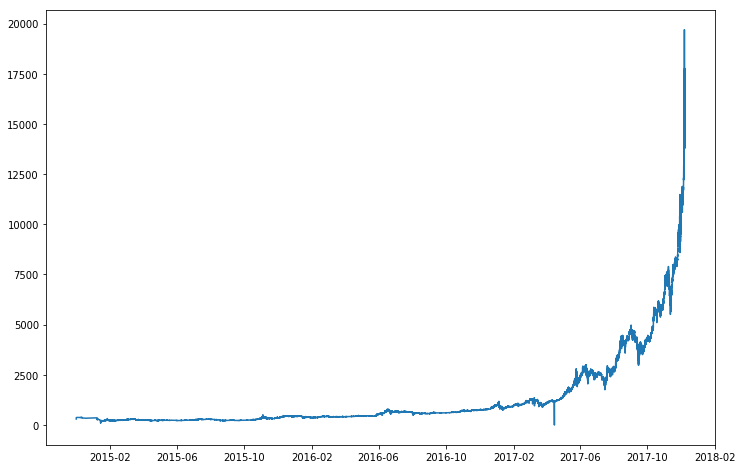

In [33]:
timebase = temp['date']//300
temp['timebase'] = timebase
datefunc = lambda x:datetime.fromtimestamp(x)
fig = plt.figure(figsize = (12,8))
ax = plt.gca()
date = temp['date'].apply(datefunc)
price = temp['ClosePrice']
ax.plot_date(date,price,'-', label = 'High frequency btc price')
plt.show()

In [35]:
temp.tail()

,Unnamed: 0,date,ClosePrice,Volumn,Datetime,timebase
26824086,26824086,1512754592,15648.05,0.058292,2017-12-08 12:36:32,5042515
26824087,26824087,1512754593,15648.04,0.047397,2017-12-08 12:36:33,5042515
26824088,26824088,1512754593,15648.04,0.037193,2017-12-08 12:36:33,5042515
26824089,26824089,1512754593,15648.04,0.173522,2017-12-08 12:36:33,5042515
26824090,26824090,1512754594,15648.05,0.001976,2017-12-08 12:36:34,5042515


In [38]:
temp_samp = temp.groupby(['timebase']).agg({'Volumn':np.sum, 'ClosePrice':np.mean, 'Datetime':np.max})

In [40]:
temp_samp.tail()

df = df.reindex(index, method='ffill')

,Volumn,ClosePrice,Datetime
timebase,,,
5042511,161.557611,15726.071946,2017-12-08 12:19:59
5042512,130.874666,15681.557453,2017-12-08 12:24:59
5042513,102.175493,15736.129300,2017-12-08 12:29:58
5042514,136.999162,15727.598154,2017-12-08 12:34:59
5042515,73.650865,15615.753022,2017-12-08 12:36:34


In [13]:
temp.to_csv('crypto_price_HF.csv')

## Crypto currency prior frequency distribution

In [1]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\CryptoQR\\")
import pandas as pd
from Utils.lm import *

# train model and generate new with varying frequencies
lm_model = LM_model(m=3, n=11, data_root_dir=r'../Data', output=r'../Output')
# t = ['1601', '1602'] # for testing
# ag_strategy_1701 = lm_model.LM_set(commodity='ag', exp_list=t, flg='train', freq=5, interval=1)
cryptos = ['BITSTAMP']
crypto_strategy = lm_model.LM(commodity='crypto', exp_list=cryptos, flg='train')
crypto_strategy.to_csv(r'../Strategy/crypto_strategy_t.csv', index=False)


============crypto train============
----------Running commodity:crypto:BITSTAMP----------
        date  BITSTAMP  COINBASE  ITBIT  KRAKEN
0  9/13/2011  5.929231       NaN    NaN     NaN
1  9/14/2011  5.590798       NaN    NaN     NaN
2  9/15/2011  5.094272       NaN    NaN     NaN
3  9/16/2011  4.854515       NaN    NaN     NaN
4  9/17/2011  4.870000       NaN    NaN     NaN


# Crypto currency trading backtest based on SLM 

In [5]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\CryptoQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

crypto_strategy = pd.read_csv(r'../Strategy/crypto_strategy_BITSTAMP.csv')
slm = crypto_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
lm_validation = LmValidation(slm, symbol = 'crypto*', data_dir = r'../Output', 
                             valid_dir = r'../Validation_IS', max_order = 8, tca = 'Fixed', opt = None, data_mode = 'Insample')
lm_validation.run()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


selected raws:464


C:\Users\wqiang\CryptoQR\Backtesting\Vectorized\backtest.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
C:\Users\wqiang\CryptoQR\Backtesting\Vectorized\backtest.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


## Crypto currency trading backtest based on MA

In [3]:
import os
import sys
sys.path.append("C:\\Users\\wqiang\\CryptoQR\\")
import pandas as pd
import numpy as np
from Backtesting.Vectorized.lm_validation import LmValidation
import numpy as np

crypto_strategy = pd.read_csv(r'../Strategy/crypto_strategy_BITSTAMP.csv')
slm = crypto_strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
max_prior = np.array(slm.loc[:, '0':'2'].max(axis=1))
tot_prior = np.array(slm.loc[:,'total'])
sig_prior = np.array(slm.loc[:,'signal'])
prior = np.array(slm.loc[:,'prior'])
prior_weight = [np.sqrt(2**(len(i)-1)) for i in prior]
max_ratio_over = max_prior/tot_prior-0.33333
prior_ratio_noise = np.sqrt((max_prior+tot_prior)/(max_prior*tot_prior))
cL = max_ratio_over/ prior_ratio_noise
mask = np.where(sig_prior=='0', 0, 1)
cL = cL*mask/np.nanmax(cL*mask)*prior_weight
slm['CL'] = cL
slm = slm.fillna(0)
lm_validation = LmValidation(slm, symbol = 'crypto*', data_dir = r'../Output', 
                             valid_dir = r'../Validation_IS', max_order = 8, tca = None, opt = None, data_mode = 'Insample')
lm_validation.run()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


selected raws:464


C:\Users\wqiang\CryptoQR\Backtesting\Vectorized\backtest.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
C:\Users\wqiang\CryptoQR\Backtesting\Vectorized\backtest.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


## Performance comparison of different strategies

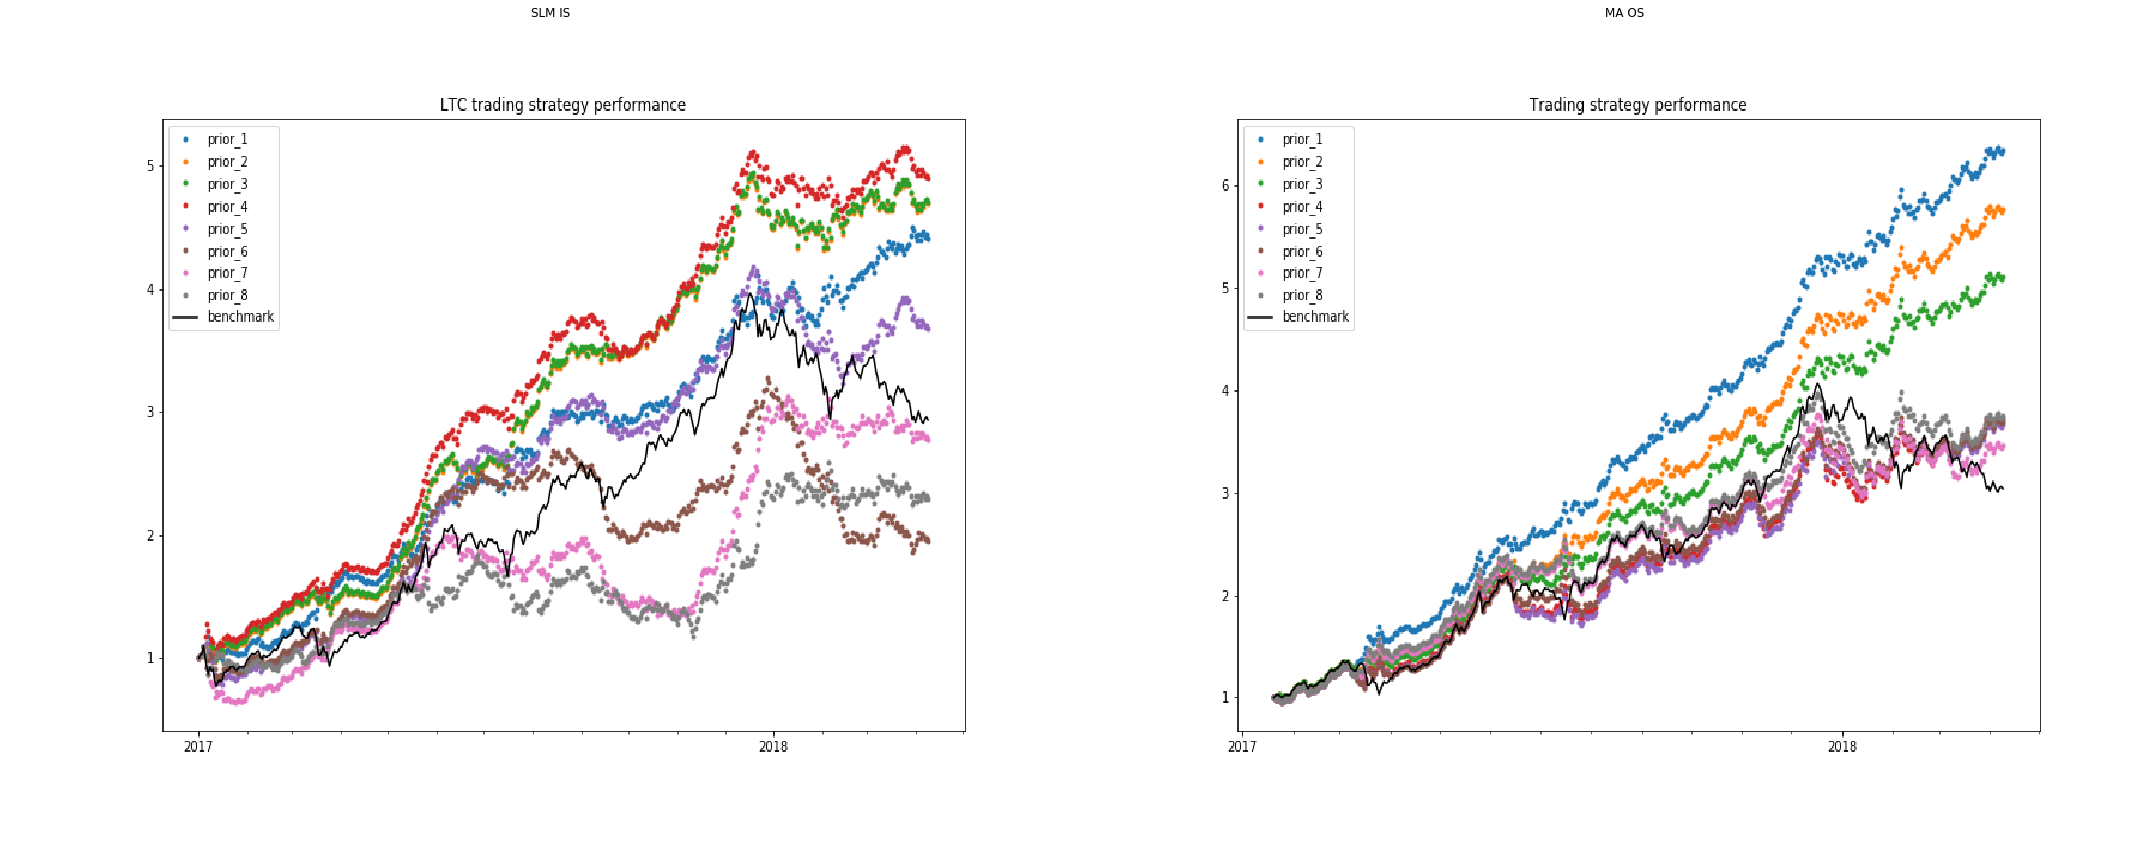

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0=mpimg.imread('../BITSTAMP_performance/Validation_IS/performance_crypto_BITSTAMP.png')
img1=mpimg.imread('../BITSTAMP_MA_performance/Validation_IS/performance_crypto_BITSTAMP.png')

fig, axarr= plt.subplots(1, 2, figsize = (30, 12))
axarr[0].imshow(img0,aspect='auto')
axarr[0].set_title('SLM IS')
axarr[0].axis('off')
axarr[1].imshow(img1,aspect='auto')
axarr[1].set_title('MA OS')
axarr[1].axis('off')

plt.tight_layout()
plt.show()